<a href="https://colab.research.google.com/github/MercuryAtom31/Business-Physics-AI-Lab/blob/main/Experiment_DataSynthesizer_Faker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 Step 1: Install Required Libraries
- **Faker**: Generates realistic synthetic data.
- **Pandas**: Handles and processes tabular data.
- **NumPy**: Assists with numerical computations.
- **DataSynthesizer**: Creates privacy-preserving synthetic datasets.
- **Scikit-learn**: Provides machine learning tools for clustering.
- **Seaborn & Matplotlib**: Used for data visualization.


In [10]:
!pip install faker pandas numpy DataSynthesizer scikit-learn seaborn matplotlib


### 📌 Step 2: Generate Realistic Data Using Faker
- Generates 1,000 **realistic** customer transactions.
- **Preserves readable text fields** for `Name`, `Merchant Name`, and `Category`.
- Saves the dataset as `realistic_transactions.csv`.



In [25]:
from faker import Faker
import pandas as pd
import numpy as np

fake = Faker()

# Generate synthetic dataset with realistic distributions
data = {
    "Customer ID": [fake.random_int(min=100000, max=999999) for _ in range(1000)],
    "Name": [fake.first_name() for _ in range(1000)],
    "Surname": [fake.last_name() for _ in range(1000)],
    "Gender": [fake.random_element(['M', 'F']) for _ in range(1000)],
    "Birthdate": [fake.date_of_birth(minimum_age=18, maximum_age=80).isoformat() for _ in range(1000)],
    "Transaction Amount": [round(np.random.exponential(scale=100), 2) for _ in range(1000)],
    "Date": [fake.date_this_year().isoformat() for _ in range(1000)],
    "Merchant Name": [fake.company() for _ in range(1000)],
    "Category": [fake.random_element(['Electronics', 'Clothing', 'Restaurant', 'Cosmetic']) for _ in range(1000)]
}

# Save the realistic dataset
realistic_df = pd.DataFrame(data)
realistic_df.to_csv("realistic_transactions.csv", index=False)
realistic_df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,709697,Jonathan,Howard,M,2007-03-06,170.88,2025-01-10,Phillips Ltd,Electronics
1,534059,Heather,Fletcher,F,1987-08-19,77.36,2025-02-25,Hester Inc,Clothing
2,966117,Robert,Boyer,M,1956-11-26,373.75,2025-02-19,Moore Ltd,Clothing
3,402451,Mark,Taylor,F,1954-09-04,325.70,2025-02-23,Rodriguez Inc,Electronics
4,190452,Samuel,Morrow,M,1998-07-25,279.53,2025-01-12,"Brady, Schmidt and Jackson",Electronics


### 📌 Step 3: Describe & Generate Numeric Synthetic Data
- **Uses DataSynthesizer only for numeric fields** (`Transaction Amount`, `Date`).
- Avoids modifying categorical text fields.
- Saves synthetic numeric data in `synthetic_numeric_df`.


In [26]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator

# Step 2.1: Generate metadata
describer = DataDescriber()
describer.describe_dataset_in_independent_attribute_mode(
    dataset_file="realistic_transactions.csv",
    epsilon=5.0  # Higher epsilon = less noise, more realism
)
describer.save_dataset_description_to_file("metadata_realistic_transactions.json")

# Step 2.2: Generate synthetic numeric data
generator = DataGenerator()
generator.generate_dataset_in_independent_mode(
    description_file="metadata_realistic_transactions.json",
    n=1000
)

# Save synthetic numeric dataset
synthetic_numeric_df = generator.synthetic_dataset

/usr/local/lib/python3.11/dist-packages/DataSynthesizer/datatypes/StringAttribute.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['lpverm' 'mqc' 'fucxt' 'vpgejyp' 'akq' 'cwrofzfc' 'dltnd' 'yfzv' 'bihh'
 'bjpnazew' 'altde' 'prk' 'qugy' 'crsba' 'bgee' 'pvztg' 'kqcoo' 'oahx'
 'bezip' 'adpukwb' 'ddcue' 'koujfyt' 'wfdtxqz' 'hkmeqmpk' 'lvoktlg'
 'hatcaxa' 'hsacg' 'maidn' 'dgggucvpuo' 'sqzl' 'bkfpz' 'nvy' 'ezanmgrrd'
 'atrdnlrex' 'pkguvgq' 'ezdh' 'aaidg' 'fhtn' 'syr' 'dipld' 'mlvr' 'sklp'
 'gdsvdv' 'bzkbvzk' 'yjnt' 'csuhi' 'yvfotxg' 'aivpfdoi' 'jzxeh'
 'btnfijvyh' 'dpfj' 'wvl' 'dsdoj' 'rpwpj' 'thhflmo' 'ocbk' 'xfoa'
 'thppbai' 'rxnxowa' 'fvwfn' 'dndidjl' 'dlltw' 'kke' 'mc' 'fpmrpy' 'jyvi'
 'doqg' 'tbplhidxl' 'whjwzng' 'hifgd' 'hs' 'lxystrylb' 'qokk' 'qpvb'
 'kvatyp' 'qij' 'uwlza' 'rhcgdnuu' 'llfqqni' 'gmwke' 'ijpah' 'fgtpzma'
 'usr' 'hbmqshii' 'qowovuhe' 'qgkugeq' 'cpyp' 'ophpyok' 'weujiul' 'vdumc'
 'cxnz

### 📌 Step 4: Restore Categorical Fields
- **Fixes distorted text** by restoring `Name`, `Merchant Name`, and `Category` from Faker-generated data.
- **Ensures synthetic data is realistic** and human-readable.
- **Fixes "Date" column, converting Unix timestamps back to standard date format**
- Saves the final dataset as `synthetic_realistic_transactions.csv`.


In [27]:
# Step 3.1: Restore correct categorical fields from original dataset
synthetic_numeric_df["Customer ID"] = realistic_df["Customer ID"]
synthetic_numeric_df["Name"] = realistic_df["Name"]
synthetic_numeric_df["Surname"] = realistic_df["Surname"]
synthetic_numeric_df["Gender"] = realistic_df["Gender"]
synthetic_numeric_df["Birthdate"] = realistic_df["Birthdate"]
synthetic_numeric_df["Merchant Name"] = realistic_df["Merchant Name"]
synthetic_numeric_df["Category"] = realistic_df["Category"]

# ✅ Fix: Convert Unix timestamps in "Date" column to human-readable format
synthetic_numeric_df["Date"] = pd.to_datetime(synthetic_numeric_df["Date"], unit='s')

# Step 3.2: Save corrected synthetic dataset
synthetic_numeric_df.to_csv("synthetic_realistic_transactions.csv", index=False)

# Step 3.3: Display first rows to verify
print(synthetic_numeric_df.head())

   Customer ID      Name   Surname Gender   Birthdate  Transaction Amount  \
0       709697  Jonathan    Howard      M  2007-03-06          233.691269   
1       534059   Heather  Fletcher      F  1987-08-19           74.383116   
2       966117    Robert     Boyer      M  1956-11-26           15.389053   
3       402451      Mark    Taylor      F  1954-09-04            2.896249   
4       190452    Samuel    Morrow      M  1998-07-25           27.277912   

        Date               Merchant Name     Category  
0 2025-03-09                Phillips Ltd  Electronics  
1 2025-03-09                  Hester Inc     Clothing  
2 2025-03-09                   Moore Ltd     Clothing  
3 2025-03-09               Rodriguez Inc  Electronics  
4 2025-03-09  Brady, Schmidt and Jackson  Electronics  


### 📌 Step 5: Validate Synthetic Data
- **T-test confirms if synthetic transaction amounts match real data.**
- **Histogram visually compares distributions.**
- **P-value > 0.05** → synthetic data is statistically similar.


T-test Statistics: 0.323
P-value: 0.747
✅ Synthetic data is statistically similar to real data.


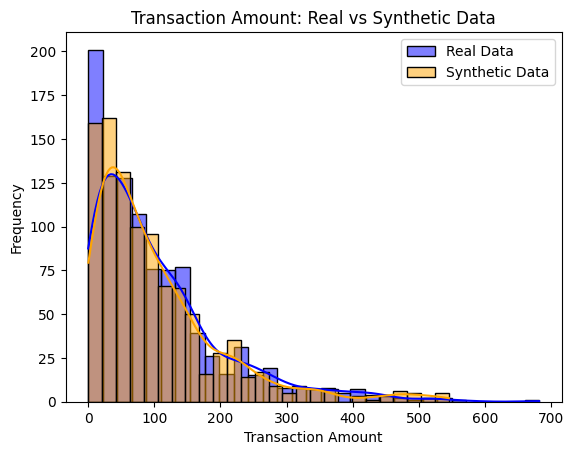

In [28]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
real_df = pd.read_csv("realistic_transactions.csv")
synthetic_df = pd.read_csv("synthetic_realistic_transactions.csv")

# Perform T-test for statistical similarity
t_stat, p_val = ttest_ind(real_df['Transaction Amount'], synthetic_df['Transaction Amount'])
print(f"T-test Statistics: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val > 0.05:
    print("✅ Synthetic data is statistically similar to real data.")
else:
    print("⚠️ Synthetic data significantly differs from real data.")

# Plot for visual validation
sns.histplot(real_df['Transaction Amount'], color='blue', kde=True, label='Real Data')
sns.histplot(synthetic_df['Transaction Amount'], color='orange', kde=True, label='Synthetic Data')
plt.legend()
plt.title('Transaction Amount: Real vs Synthetic Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### 📌 Step 6: Perform Customer Segmentation
- **Uses KMeans clustering** to segment customers based on spending behavior.
- **Assigns each customer** to a segment (low, medium, high spenders).


In [30]:
from sklearn.cluster import KMeans

X = synthetic_df[['Transaction Amount']]

# Train KMeans segmentation model
kmeans = KMeans(n_clusters=3, random_state=42)
synthetic_df['Segment'] = kmeans.fit_predict(X)

# Display first rows to verify
print(synthetic_df.head())

   Customer ID      Name   Surname Gender   Birthdate  Transaction Amount  \
0       709697  Jonathan    Howard      M  2007-03-06          233.691269   
1       534059   Heather  Fletcher      F  1987-08-19           74.383116   
2       966117    Robert     Boyer      M  1956-11-26           15.389053   
3       402451      Mark    Taylor      F  1954-09-04            2.896249   
4       190452    Samuel    Morrow      M  1998-07-25           27.277912   

                  Date               Merchant Name     Category  Segment  
0  2025-03-09 00:00:00                Phillips Ltd  Electronics        1  
1  2025-03-09 00:00:00                  Hester Inc     Clothing        0  
2  2025-03-09 00:00:00                   Moore Ltd     Clothing        0  
3  2025-03-09 00:00:00               Rodriguez Inc  Electronics        0  
4  2025-03-09 00:00:00  Brady, Schmidt and Jackson  Electronics        0  


### 📌 Step 7: Visualize Customer Segmentation
- **Strip plot shows customer segmentation by transaction amount.**
- **Color-coded segments** help analyze spending behavior.


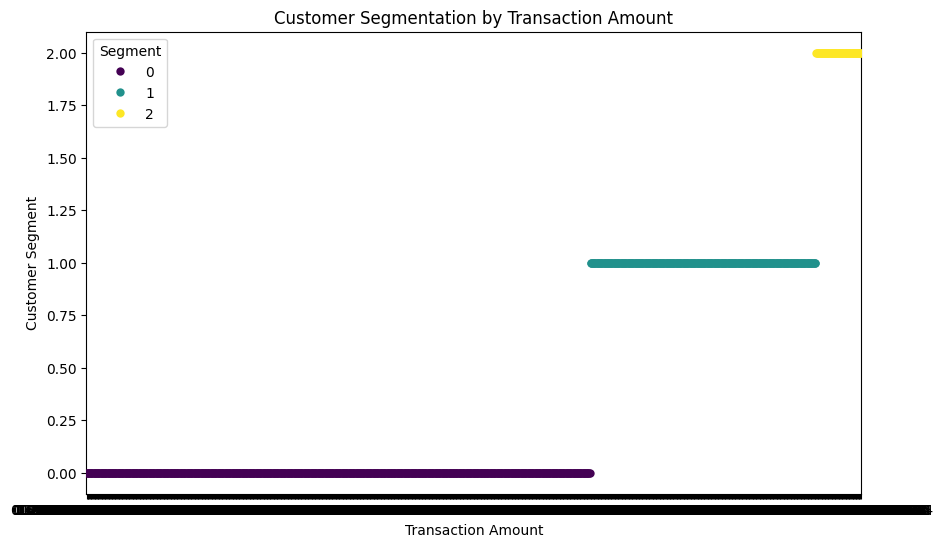

In [31]:
plt.figure(figsize=(10, 6))

sns.stripplot(
    x='Transaction Amount',
    y='Segment',
    data=synthetic_df,
    hue='Segment',
    palette='viridis',
    jitter=0.3,
    size=6,
    legend='full'
)

plt.title('Customer Segmentation by Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Segment')
plt.legend(title='Segment')
plt.show()